# Price Optimization

In [1]:
import pandas as pd

pricing_data = pd.read_csv('Competition_Data.csv')

pricing_data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [2]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


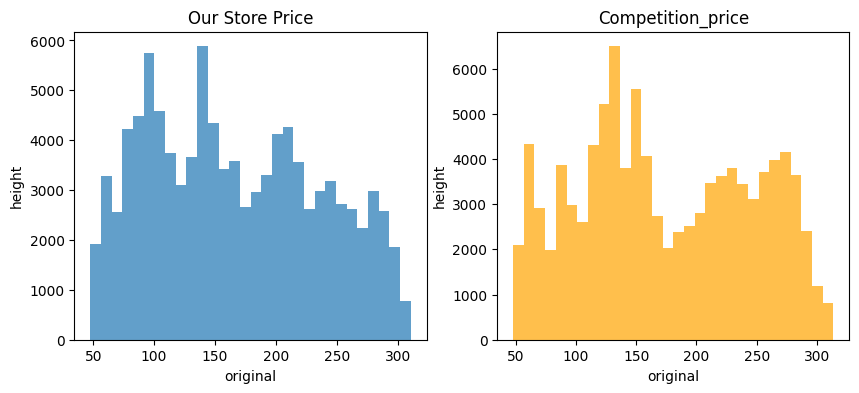

In [3]:
#Compare the store prices with our competitors prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(pricing_data['Price'], bins=30, alpha=.7, label= 'Price')
plt.ylabel('height')
plt.xlabel('original')
plt.title('Our Store Price')

plt.subplot(1,2,2)
plt.hist(pricing_data['Competition_Price'], bins=30, alpha=.7, color= 'orange', label = 'Competition_Price')
plt.ylabel('height')
plt.xlabel('original')
plt.title('Competition_price')

plt.show()

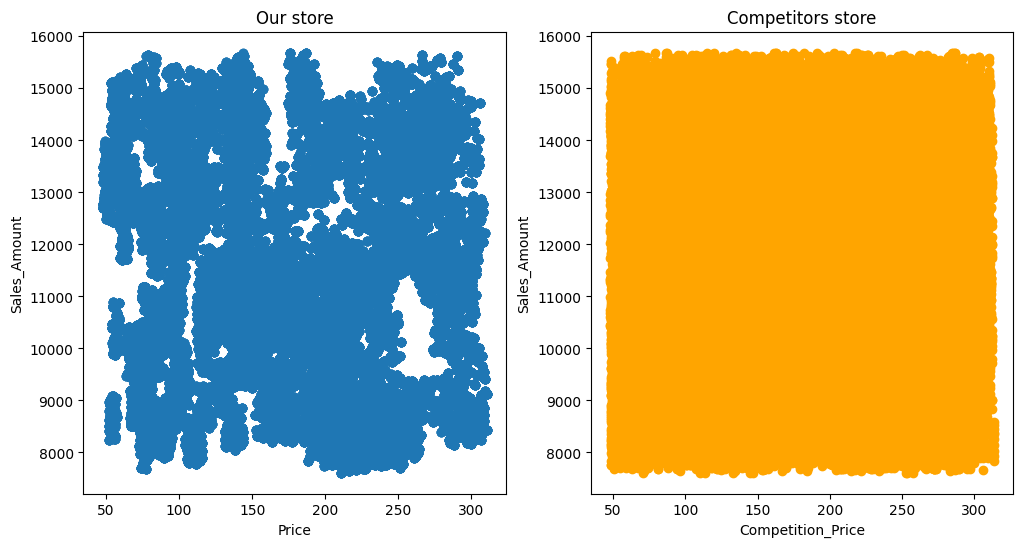

In [4]:
#Comparing the prices and the sales of our store and competitors
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'])
plt.ylabel('Sales_Amount')
plt.xlabel('Price')
plt.title('Our store')

plt.subplot(1,2,2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], color = 'orange')
plt.ylabel('Sales_Amount')
plt.xlabel('Competition_Price')
plt.title('Competitors store')

plt.show()

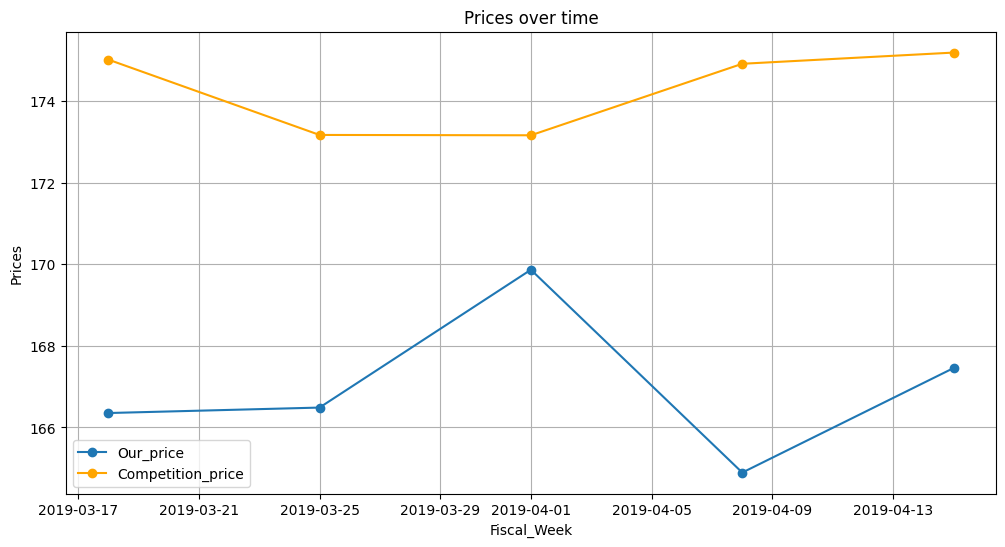

In [5]:
#Comparing the price over time
pricing_data['Fiscal_Week_ID']= pd.to_datetime(pricing_data['Fiscal_Week_ID']+ '-1', format= '%Y-%U-%w')

weekly_price = pricing_data.groupby('Fiscal_Week_ID').agg({'Price': 'mean', 'Competition_Price': 'mean'}).reset_index()

plt.figure(figsize=(12,6))
plt.plot(weekly_price['Fiscal_Week_ID'], weekly_price['Price'], label='Our_price', marker = 'o')
plt.plot(weekly_price['Fiscal_Week_ID'], weekly_price['Competition_Price'],color = 'orange', label='Competition_price', marker = 'o')

plt.xlabel('Fiscal_Week')
plt.ylabel('Prices')
plt.title('Prices over time')
plt.legend()
plt.grid(True)
plt.show()



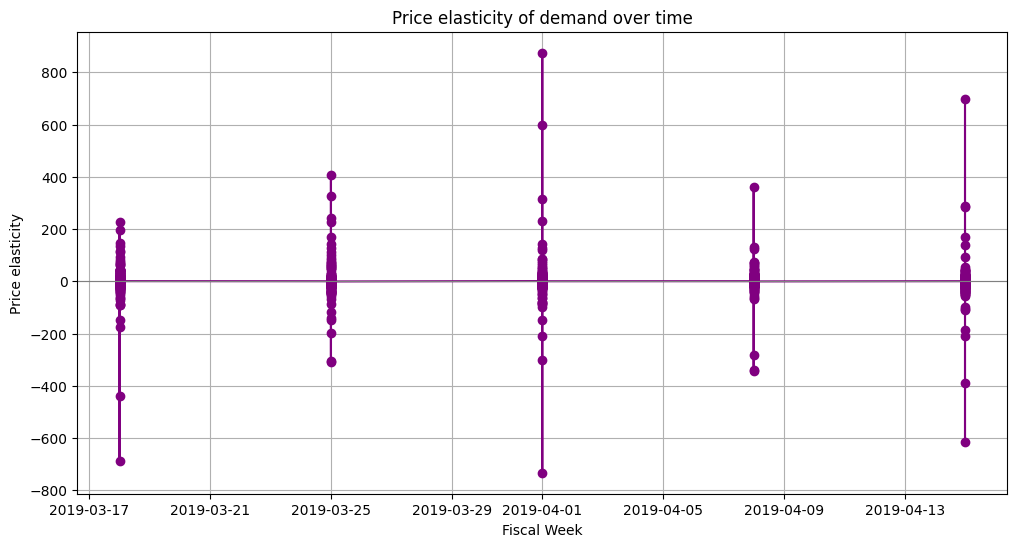

In [6]:
#Let's see the effects price has over demand over time
#Observing Price elasticity

pricing_data['Price_Elasticity']= pricing_data['Price'].pct_change()
pricing_data['Demand_Elasticity']= pricing_data['Item_Quantity'].pct_change()

pricing_data['Elasticity']=pricing_data['Demand_Elasticity']/pricing_data['Price_Elasticity']


pricing_data.replace({'Elasticity': {float('inf'): float('nan'), -float('inf'): float('nan')}}, inplace=True)
pricing_data.dropna(subset=['Elasticity'], inplace=True)

plt.figure(figsize=(12,6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['Elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price elasticity')
plt.title('Price elasticity of demand over time')
plt.grid(True)
plt.show()

In [7]:
#Compare total Sales of your store and competitions
total_sales_store= pricing_data['Sales_Amount'].sum()
total_sales_competitors= (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

total_quantity_store=pricing_data['Item_Quantity'].sum()
total_quantity_competitors=pricing_data['Item_Quantity'].sum()

Summary=pd.DataFrame({'Metrics':['Total_Sales_Amount', 'Total_Qty_Sold'],
                      'Store': [total_sales_store, total_quantity_store],
                      'Competition': [total_sales_competitors, total_quantity_competitors]
        
                     })
Summary


,Metrics,Store,Competition
0,Total_Sales_Amount,1.141005e+08,6.962097e+08
1,Total_Qty_Sold,3.984776e+06,3.984776e+06


In [8]:
#define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=True)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=True)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket', observed=False)['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket', observed=False)['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

# merge the results
sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20668934.69,1.092184e+08
4,201-250,20744025.17,1.909748e+08
5,251-300,16765834.08,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


In [9]:
#segment customers based on purchasing behaviour
pricing_data_unique = pricing_data.drop_duplicates(subset=['Item_ID'])

# Create item summary with mean price and sum of item quantities
item_summary = pricing_data_unique.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# Merge pricing_data with item_summary
pricing_data_final = pd.merge(pricing_data_unique, item_summary, on='Item_ID', how='left', suffixes=('', '_avg'))

# Segment the data based on the average price
pricing_data_final['segment'] = pd.cut(pricing_data_final['Price_avg'], bins=[0, 50, 150, 300], labels=['low', 'medium', 'high'])

# Calculate elasticity for each segment
segments = pricing_data_final['segment'].unique()
elasticity_data = []

for segment in segments:
    # Create a copy of the segment data to avoid the warning
    segment_data = pricing_data_final[pricing_data_final['segment'] == segment].copy()
    
    # Calculate price and quantity changes
    segment_data.loc[:, 'price_change'] = segment_data['Price'].pct_change()
    segment_data.loc[:, 'qty_change'] = segment_data['Item_Quantity'].pct_change()
    
    # Calculate elasticity
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    
    # Replace infinite values with NaN
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    
    # Calculate average elasticity for the segment
    avg_elasticity = segment_data['elasticity'].mean()
    
    # Append the result to the elasticity data
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

# Create a DataFrame from the elasticity data
elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df


,segment,avg_elasticity
0,medium,-0.295420
1,high,0.589712
2,low,NaN


In [10]:
#Merge the pricing_data_final to the main pricing_data
pricing_data = pricing_data.merge(pricing_data_final[['Item_ID', 'segment']], on='Item_ID', how='left')
pricing_data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,Price_Elasticity,Demand_Elasticity,Elasticity,price_bracket,competition_price_bracket,competition_sales_amt,segment
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,medium
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,medium
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,medium
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,medium
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,medium


In [11]:
# create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()
dynamic_pricing_data.head()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data.fillna({'dynamic_price': dynamic_pricing_data['Price']}, inplace=True)
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']


# compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.572053e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [12]:
pricing_data['dynamic_price']=dynamic_pricing_data['dynamic_price']